In [1]:
%load_ext autoreload
%autoreload 2

import rare_traffic_sign_solution as rtss
import lib

import torch
import torchvision
from torchvision import transforms as T
from torch.utils.data import Dataset, DataLoader, random_split
from torch import nn
import torch.nn.functional as F
import pytorch_lightning as pl
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
from torchvision.datasets import ImageFolder

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from math import floor, ceil
from sklearn.model_selection import train_test_split

import shutil
import requests
import functools
import pathlib
from pathlib import Path
import shutil
from tqdm.notebook import tqdm
import os
from collections import defaultdict

from IPython.display import clear_output

matplotlib.rcParams['figure.figsize'] = (20, 1)

MEAN = np.array([0.485, 0.456, 0.406])
STD = np.array([0.229, 0.224, 0.225])

In [2]:
dataset_train = rtss.DatasetRTSD(
    # ['cropped-train'],
    ['synthetic_3'],
    'classes.json',
)

dataset_test = rtss.DatasetRTSD(
    ['cropped-train'],
    # ['synthetic'],
    'classes.json',
)

batch_size = 16
train_loader = DataLoader(dataset_train, batch_size=batch_size, num_workers=16, shuffle=True)
valid_loader = DataLoader(dataset_test, batch_size=batch_size, num_workers=16, shuffle=True)

# lib.display_loader(train_loader)
# lib.display_loader(valid_loader)

In [3]:
train_size = int(0.01 * len(dataset_train))
test_size = len(dataset_train) - train_size
small_train, _  = torch.utils.data.random_split(dataset_train, [train_size, test_size])
small_train = DataLoader(small_train, batch_size=batch_size,  num_workers=16, shuffle=True)

In [4]:
train_size = int(0.01 * len(dataset_test))
test_size = len(dataset_test) - train_size
small_test, _  = torch.utils.data.random_split(dataset_test, [train_size, test_size])
small_test = DataLoader(small_test, batch_size=batch_size,  num_workers=16, shuffle=True)

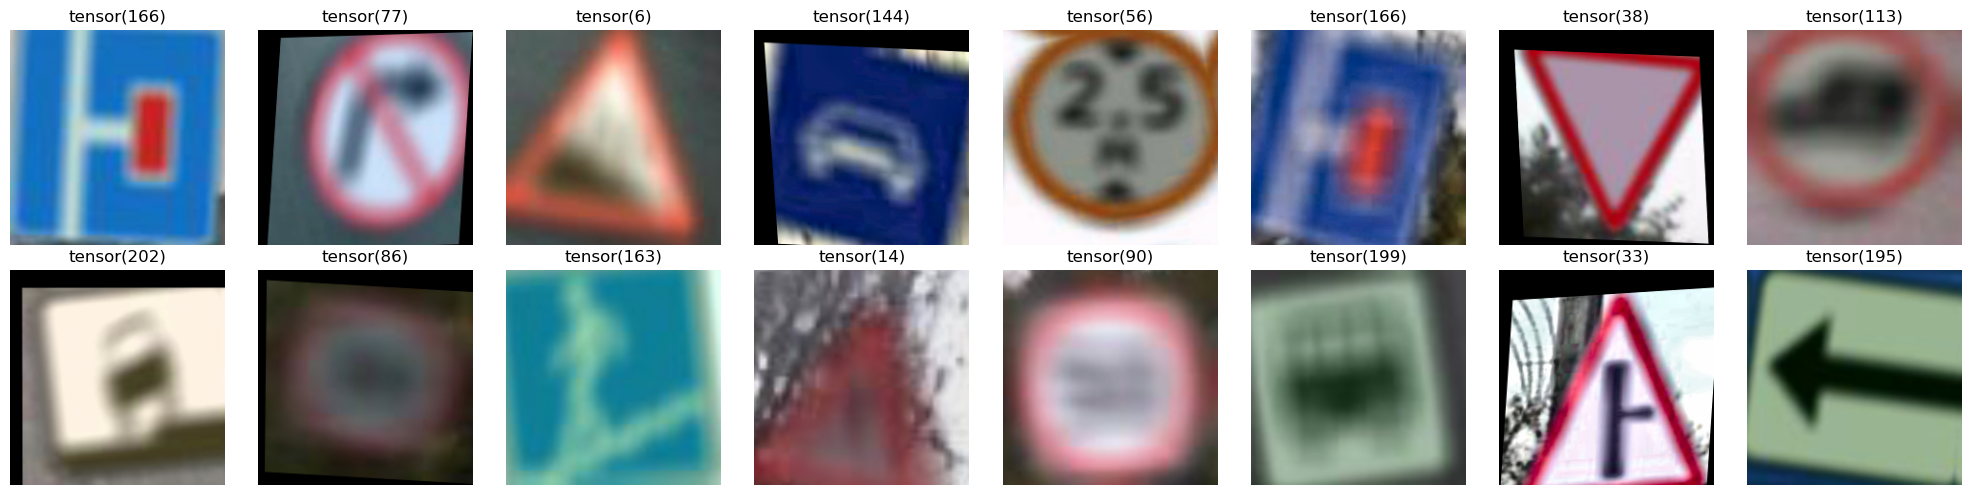

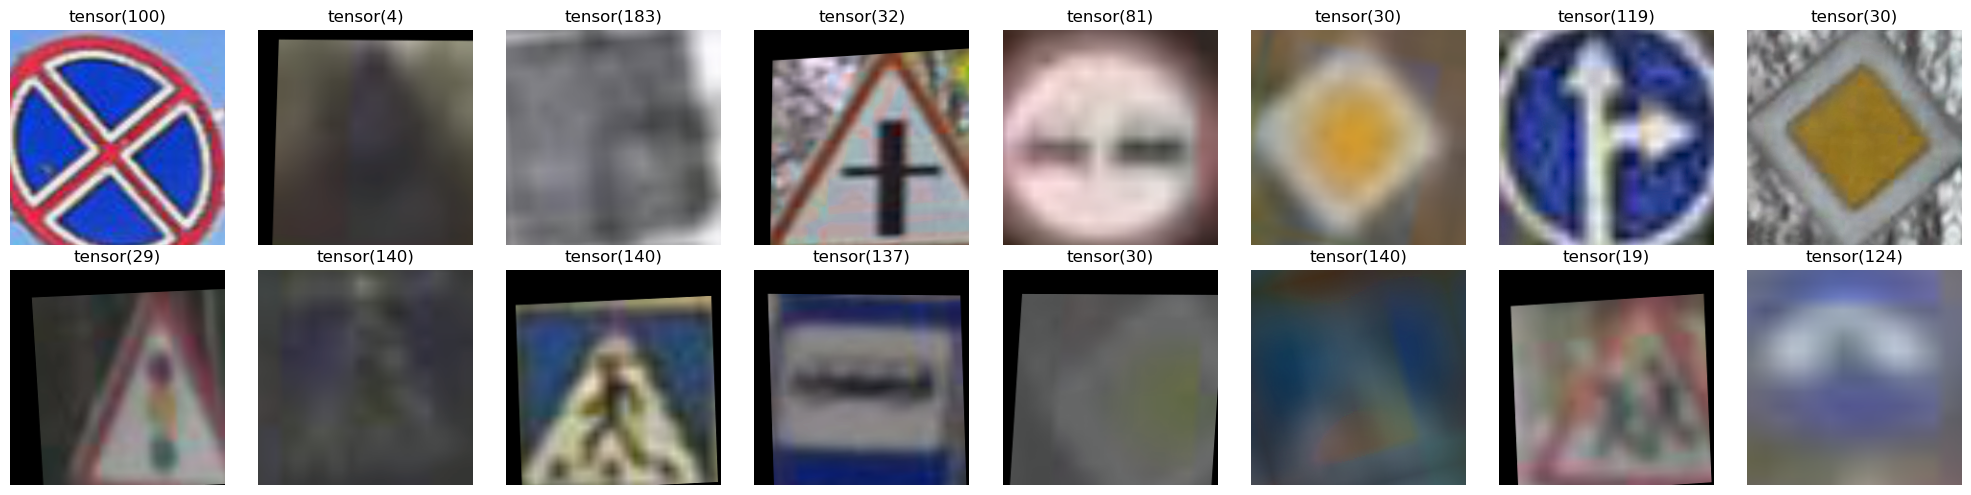

In [5]:
lib.display_loader(small_train)
lib.display_loader(small_test)

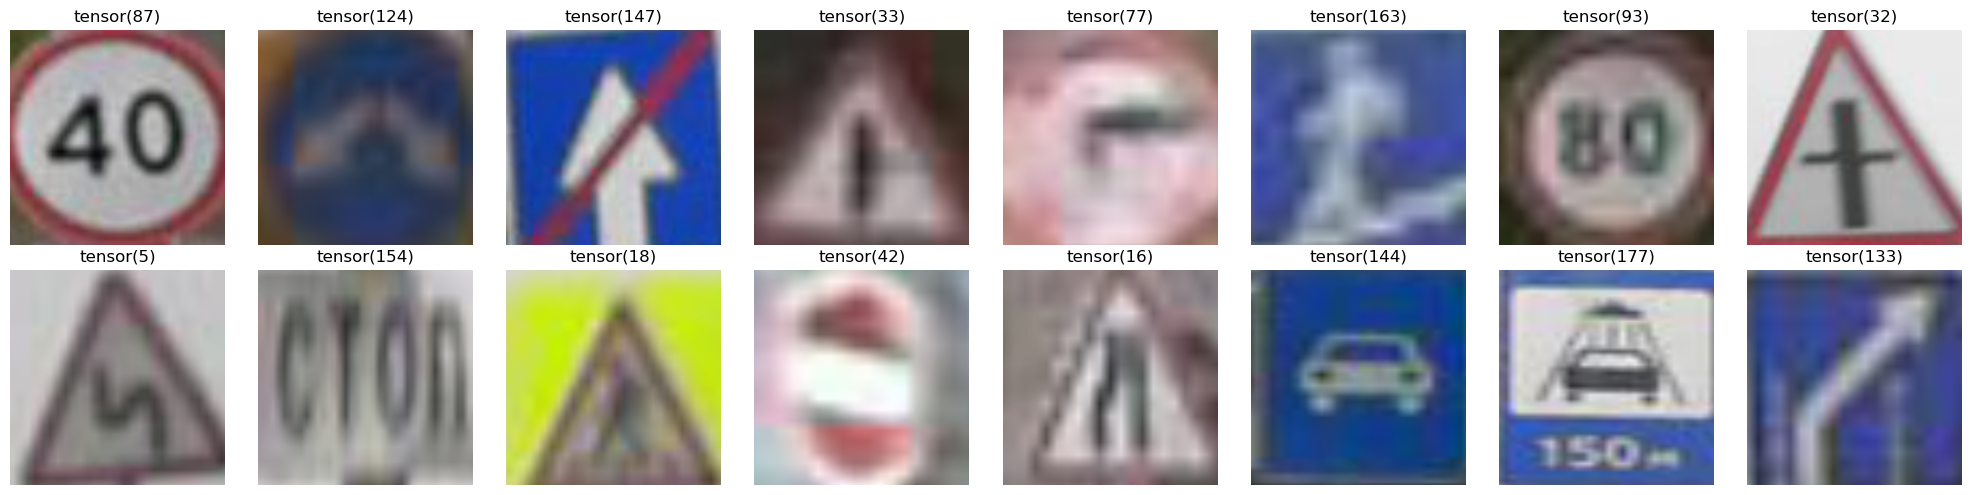

In [6]:
dataset_test = rtss.TestData('smalltest', 'classes.json', 'smalltest_annotations.csv', return_class_name=False)
dataset_test[0]
test_loader = DataLoader(dataset_test, batch_size=16, num_workers=16)
lib.display_loader(test_loader)

In [3]:
model = rtss.CustomNetwork(features_criterion=None, classes_file='classes.json')
model.load_state_dict(torch.load('/home/alexkkir/cv-hw10-road-signs/runs/synt_2/epoch=13-val_acc=0.978.ckpt', map_location='cpu')['state_dict'])

<All keys matched successfully>

In [7]:
trainer = pl.Trainer(
    accelerator='gpu',
    devices=[1]
)
trainer.validate(model, dataloaders=test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Validation: 0it [00:00, ?it/s]

[Epoch   0] VALID acc: 0.89, loss: 0.49, total_acc: 0.89, rare_recall: 0.55, freq_recall: 0.94 

2022-11-23 15:11:44.308366: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-23 15:11:45.173574: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-23 15:11:46.906761: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/alexkkir/anaconda3/lib/python3.8/site-packages/cv2/../../lib64:
2022-11-23 15:11:

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         val_acc            0.8931167721748352
     val_freq_recall        0.9431818127632141
        val_loss            0.48537591099739075
     val_rare_recall        0.5454545617103577
      val_total_acc          0.893048107624054
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val_loss': 0.48537591099739075,
  'val_acc': 0.8931167721748352,
  'val_total_acc': 0.893048107624054,
  'val_rare_recall': 0.5454545617103577,
  'val_freq_recall': 0.9431818127632141}]

In [19]:
torch.save(model.state_dict(), 'simple_model_with_synt.pth')

[autoreload of rare_traffic_sign_solution failed: Traceback (most recent call last):
  File "/home/alexkkir/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/home/alexkkir/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/home/alexkkir/anaconda3/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/alexkkir/cv-hw10-road-signs/rare_traffic_sign_solution.py", line 559, in <module>
    train_size = int(0.8 * len(dataset))
NameError: name 'dataset' is not defined
]
